Problem Statement:

To build a machine learning model that can predict wheather a person has heart disease or not.

Importing all the necessary libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import Imputer

Preparing the Data:
    
    1.Query the Data:
        

In [2]:
dataframe=pd.read_csv("file:///C:/Users/Tarun/Downloads/heart_diesease_csv_dataset.data",
                      header=None,
                      names=['age','sex','chest_pain','resting_blood_pressure',
                      'cholestrol','fasting_blood_sugar','resting_ECG','max_heart_rate',
                      'exercise_induced_angina','depression_by_exercise',
                      'slope_of_exercise','number_of_vessels','thal','result'])

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null float64
sex                        303 non-null float64
chest_pain                 303 non-null float64
resting_blood_pressure     303 non-null float64
cholestrol                 303 non-null float64
fasting_blood_sugar        303 non-null float64
resting_ECG                303 non-null float64
max_heart_rate             303 non-null float64
exercise_induced_angina    303 non-null float64
depression_by_exercise     303 non-null float64
slope_of_exercise          303 non-null float64
number_of_vessels          303 non-null object
thal                       303 non-null object
result                     303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
dataframe.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,depression_by_exercise,slope_of_exercise,result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
dataframe.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,depression_by_exercise,slope_of_exercise,number_of_vessels,thal,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
dataframe.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_sugar        0
resting_ECG                0
max_heart_rate             0
exercise_induced_angina    0
depression_by_exercise     0
slope_of_exercise          0
number_of_vessels          0
thal                       0
result                     0
dtype: int64

    2.Clean the Data:
        2.1 Dealing with missing Values

In [7]:
dataframe=dataframe.replace('?',value=np.NaN)

In [8]:
dataframe.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_sugar        0
resting_ECG                0
max_heart_rate             0
exercise_induced_angina    0
depression_by_exercise     0
slope_of_exercise          0
number_of_vessels          4
thal                       2
result                     0
dtype: int64

In [9]:
columns=dataframe.columns
imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=1)
dataframe=pd.DataFrame(imp.fit_transform(dataframe))
dataframe.columns=columns

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
dataframe.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_sugar        0
resting_ECG                0
max_heart_rate             0
exercise_induced_angina    0
depression_by_exercise     0
slope_of_exercise          0
number_of_vessels          0
thal                       0
result                     0
dtype: int64

    2.2 Remove the Outliners:

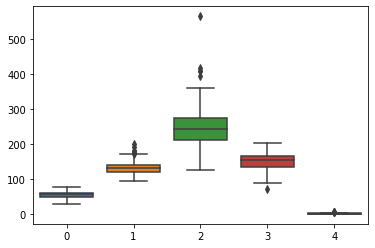

In [11]:
sns.boxplot(data=[dataframe['age'],dataframe['resting_blood_pressure'],dataframe['cholestrol'],
                  dataframe['max_heart_rate'],dataframe['depression_by_exercise']])

In [12]:
def eliminating_outliner(dataframe_in,column_name):
    quan1=dataframe_in[column_name].quantile(0.25)
    quan3=dataframe_in[column_name].quantile(0.75)
    interQuantileRange=quan3-quan1
    min_boundary=quan1-1.5*interQuantileRange
    max_boundary=quan3+1.5*interQuantileRange
    dataframe_out=dataframe_in.loc[(dataframe_in[column_name]>min_boundary) & (dataframe_in[column_name]<max_boundary)]
    return dataframe_out

dataframe['resting_blood_pressure']=eliminating_outliner(dataframe,'resting_blood_pressure')
dataframe['cholestrol']=eliminating_outliner(dataframe,'cholestrol')
dataframe['max_heart_rate']=eliminating_outliner(dataframe,'max_heart_rate')

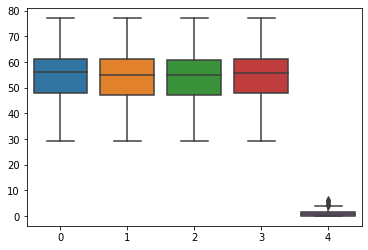

In [13]:
sns.boxplot(data=[dataframe['age'],dataframe['resting_blood_pressure'],
                  dataframe['cholestrol'],dataframe['max_heart_rate'],dataframe['depression_by_exercise']])


In [14]:
dataframe = pd.get_dummies(dataframe, columns = ['sex', 'chest_pain',
                                                 'fasting_blood_sugar', 'resting_ECG', 'exercise_induced_angina', 
                                                 'slope_of_exercise', 'number_of_vessels', 'thal'])

In [15]:
dataframe.head()

,age,resting_blood_pressure,cholestrol,max_heart_rate,depression_by_exercise,result,sex_0.0,sex_1.0,chest_pain_1.0,chest_pain_2.0,...,slope_of_exercise_3.0,number_of_vessels_0.0,number_of_vessels_1.0,number_of_vessels_2.0,number_of_vessels_3.0,thal_0.0,thal_1.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,63.0,63.0,63.0,2.3,0.0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
1,67.0,67.0,67.0,67.0,1.5,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,67.0,67.0,67.0,67.0,2.6,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,37.0,37.0,37.0,37.0,3.5,0.0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
4,41.0,41.0,41.0,41.0,1.4,0.0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
age                            303 non-null float64
resting_blood_pressure         290 non-null float64
cholestrol                     298 non-null float64
max_heart_rate                 302 non-null float64
depression_by_exercise         303 non-null float64
result                         303 non-null float64
sex_0.0                        303 non-null uint8
sex_1.0                        303 non-null uint8
chest_pain_1.0                 303 non-null uint8
chest_pain_2.0                 303 non-null uint8
chest_pain_3.0                 303 non-null uint8
chest_pain_4.0                 303 non-null uint8
fasting_blood_sugar_0.0        303 non-null uint8
fasting_blood_sugar_1.0        303 non-null uint8
resting_ECG_0.0                303 non-null uint8
resting_ECG_1.0                303 non-null uint8
resting_ECG_2.0                303 non-null uint8
exercise_induced_angina_0.0    30


3.Feature Engineering:


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'resting_blood_pressure', 'cholestrol', 'max_heart_rate', 'depression_by_exercise']
dataframe[columns_to_scale] = standardScaler.fit_transform(dataframe[columns_to_scale])
dataframe.head(5)

,age,resting_blood_pressure,cholestrol,max_heart_rate,depression_by_exercise,result,sex_0.0,sex_1.0,chest_pain_1.0,chest_pain_2.0,...,slope_of_exercise_3.0,number_of_vessels_0.0,number_of_vessels_1.0,number_of_vessels_2.0,number_of_vessels_3.0,thal_0.0,thal_1.0,thal_3.0,thal_6.0,thal_7.0
0,0.948726,0.964757,0.963914,0.954829,1.087338,0.0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
1,1.392002,1.403972,1.407196,1.398799,0.397182,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.392002,1.403972,1.407196,1.398799,1.346147,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-1.932564,-1.890137,-1.917416,-1.930975,2.122573,0.0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
4,-1.489288,-1.450922,-1.474134,-1.487005,0.310912,0.0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


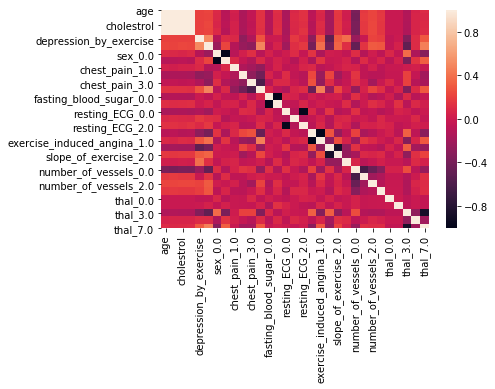

In [18]:
correlationMatrix = dataframe.corr()
top_corr_features = correlationMatrix.index
#plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataframe[top_corr_features].corr())

In [19]:
dataframe['result'].replace(to_replace=[1,2,3,4],value=1,inplace=True)

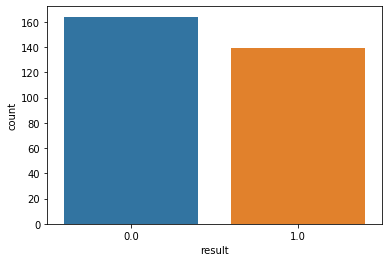

In [20]:
sns.countplot(x='result',data=dataframe)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250B47B3F88>,
      dtype=object)

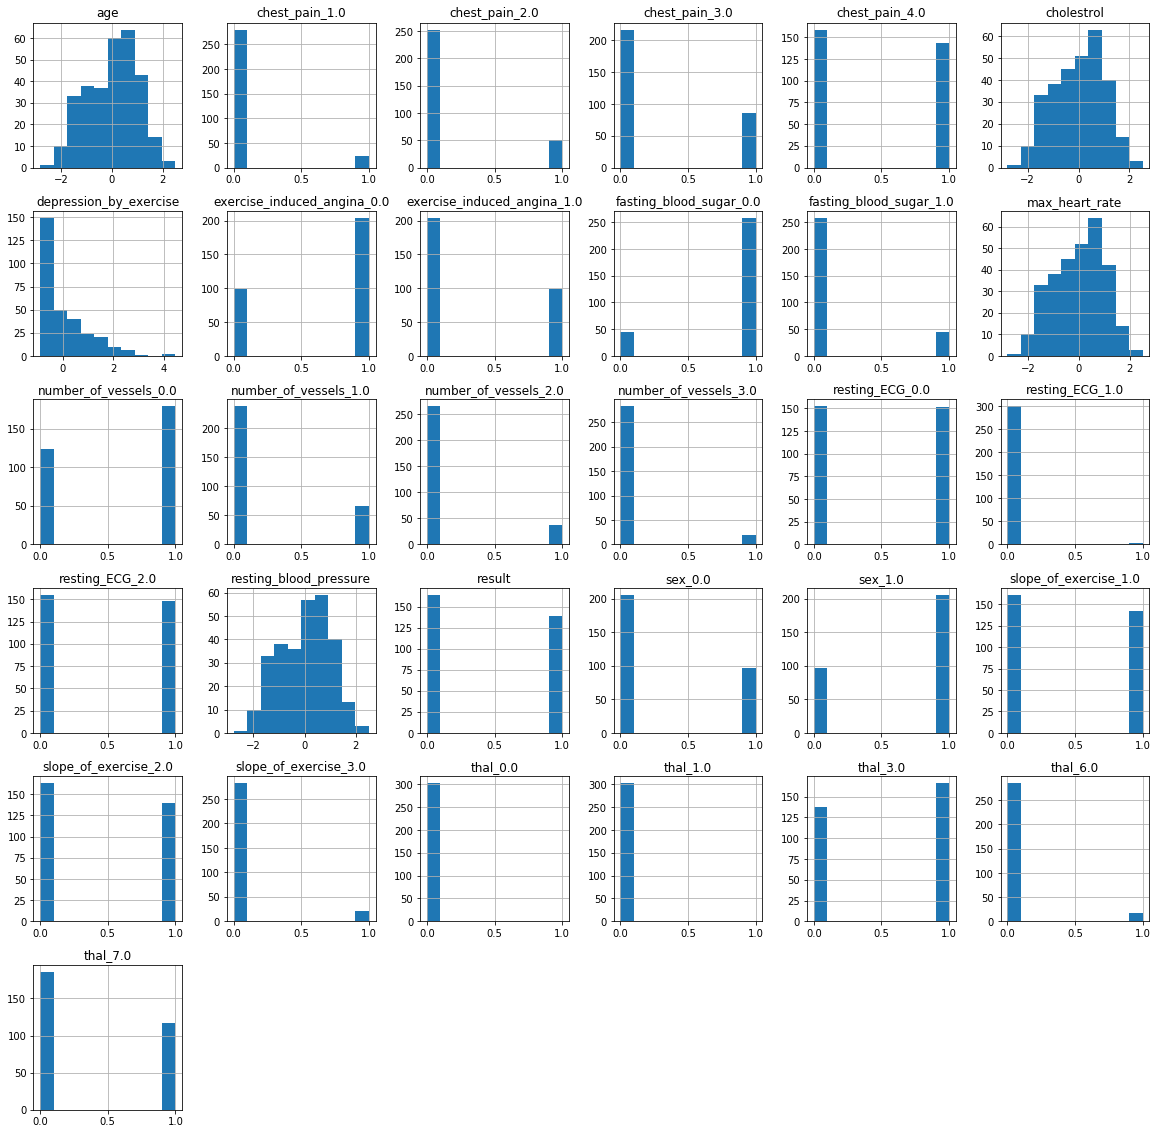

In [21]:
dataframe.hist(ax= plt.figure(figsize = (20,20)).gca())

4. Model Building & Performance Measurements:
    We are going to experiment with 5 algorithms,
        1.LogisticRegression
        2.Naive Bayes Classifier
        3.KNeighborsClassifier
        4.DecisionTreeClassifier
        5.RandomForestClassifier
        
    and then compare the accuracy. But before that we'll use cross validation for training and testing our dataset.
    

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
columns=dataframe.columns
imp=Imputer(missing_values='NaN',strategy='mean',axis=1)
dataframe=pd.DataFrame(imp.fit_transform(dataframe))
dataframe.columns=columns

Y_result_label=dataframe['result']
X_label=dataframe.drop(['result'],axis=1)

def model_score_calculator(model,X_label,Y_label):
    model.fit(X_label,Y_label)
    score=cross_val_score(model,X_label,Y_result_label,cv=10)
    y_pred=model.predict(X_label)
    print('Learning Accuracy:',score.mean())
    print('Prediction Accuracy:',metrics.accuracy_score(Y_result_label,y_pred))
    print('Confusion Matrix:')
    print(metrics.confusion_matrix(Y_result_label,y_pred))
    print('Model Classification Report:')
    print(metrics.classification_report(Y_result_label,y_pred))

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Creating a generalize method that returns the score of the different models:

In [24]:
model_score_calculator(LogisticRegression(),X_label,Y_result_label)

Learning Accuracy: 0.8539340007415646
Prediction Accuracy: 0.8679867986798679
Confusion Matrix:
[[148  16]
 [ 24 115]]
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       164
         1.0       0.88      0.83      0.85       139

    accuracy                           0.87       303
   macro avg       0.87      0.86      0.87       303
weighted avg       0.87      0.87      0.87       303



In [25]:
model_score_calculator(GaussianNB(),X_label,Y_result_label)

Learning Accuracy: 0.8150166852057843
Prediction Accuracy: 0.8382838283828383
Confusion Matrix:
[[146  18]
 [ 31 108]]
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       164
         1.0       0.86      0.78      0.82       139

    accuracy                           0.84       303
   macro avg       0.84      0.83      0.84       303
weighted avg       0.84      0.84      0.84       303



In [26]:
model_score_calculator(KNeighborsClassifier(n_neighbors=20),X_label,Y_result_label)

Learning Accuracy: 0.8316833518724509
Prediction Accuracy: 0.8448844884488449
Confusion Matrix:
[[149  15]
 [ 32 107]]
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       164
         1.0       0.88      0.77      0.82       139

    accuracy                           0.84       303
   macro avg       0.85      0.84      0.84       303
weighted avg       0.85      0.84      0.84       303



In [27]:
model_score_calculator(DecisionTreeClassifier(),X_label,Y_result_label)

Learning Accuracy: 0.764004449388209
Prediction Accuracy: 0.9966996699669967
Confusion Matrix:
[[164   0]
 [  1 138]]
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       164
         1.0       1.00      0.99      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



In [28]:
model_score_calculator(RandomForestClassifier(n_estimators=7),X_label,Y_result_label)

Learning Accuracy: 0.8080200222469409
Prediction Accuracy: 0.9735973597359736
Confusion Matrix:
[[159   5]
 [  3 136]]
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       164
         1.0       0.96      0.98      0.97       139

    accuracy                           0.97       303
   macro avg       0.97      0.97      0.97       303
weighted avg       0.97      0.97      0.97       303



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

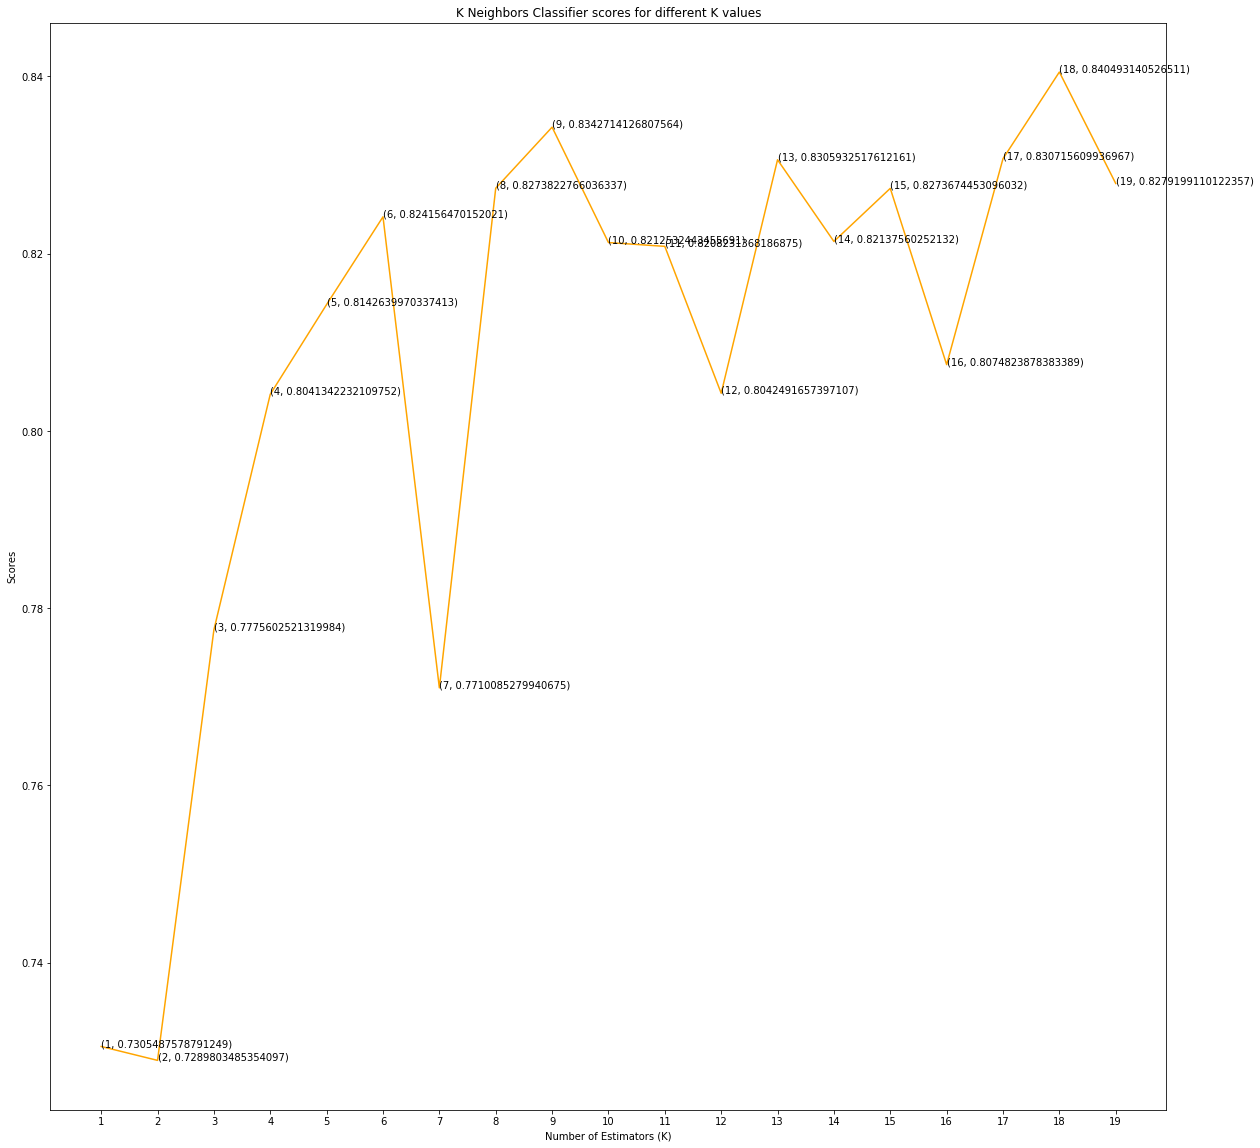

In [29]:
rfc_scores = []
for k in range(1,20):
    rfc_classifier = RandomForestClassifier(n_estimators=k)
    score=cross_val_score(rfc_classifier,X_label,Y_result_label,cv=10)
    rfc_scores.append(score.mean())
    
plt.figure(figsize = (20,20))
plt.plot([k for k in range(1, 20)], rfc_scores, color = 'orange')
for i in range(1,20):
    plt.text(i, rfc_scores[i-1], (i, rfc_scores[i-1]))

plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Estimators (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [30]:
model_score_calculator(RandomForestClassifier(n_estimators=17),X_label,Y_result_label)

Learning Accuracy: 0.8141490545050056
Prediction Accuracy: 0.9933993399339934
Confusion Matrix:
[[163   1]
 [  1 138]]
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       164
         1.0       0.99      0.99      0.99       139

    accuracy                           0.99       303
   macro avg       0.99      0.99      0.99       303
weighted avg       0.99      0.99      0.99       303

